# K Nearest Neighbors Project
Neste projeto serão utilizados dados fictícios <i>(Anonymised Classified Data)</i> para um problema de classificação, porém sem nenhum tipo de informação de contexto das variáveis e dos valores contidos. O objetivo será utilizar estas features desconhecidas para predizer uma classe 1 ou 0.

## Etapas: 
1. Entendimento dos Dados;
2. Tratamento dos Dados;
3. Análise Exploratória de Dados;
4. Padronização e divisão dos dados em Treino e Teste;
5. Modelagem do Algorítmo K Nearest Neighbors com diferentes valores de K;
6. Sumários, métricas e conclusões.

In [1]:
# Imports for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats

sns.set_style('white')
sns.set_palette('viridis')
sns.set_color_codes('colorblind')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('KNN_Project_Data')

# 1. Entendimento dos Dados
Como estamos lidando com dados propositalmente desconhecidos esta etapa será focada em entender algum possível tratamento que deva ser feito.

In [3]:
df.head(1)

XVPM        GWYH         TRAT        TLLZ        IGGA         HYKR  \
0  1636.670614  817.988525  2565.995189  358.347163  550.417491  1618.870897   

          EDFS        GUUB         MGJM        JHZC  TARGET CLASS  
0  2147.641254  330.727893  1494.878631  845.136088             0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [5]:
df.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [6]:
np.isinf(df).sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

XVPM         GWYH         TRAT         TLLZ         IGGA  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1055.071157   991.851567  1529.373525   495.107156   940.590072   
std     370.980193   392.278890   640.286092   142.789188   345.923136   
min      21.170000    21.720000    31.800000     8.450000    17.930000   
25%     767.413366   694.859326  1062.600806   401.788135   700.763295   
50%    1045.904805   978.355081  1522.507269   500.197421   939.348662   
75%    1326.065178  1275.528770  1991.128626   600.525709  1182.578166   
max    2117.000000  2172.000000  3180.000000   845.000000  1793.000000   

              HYKR         EDFS         GUUB         MGJM         JHZC  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean   1550.637455  1561.003252   561.346117  1089.067338  1452.521629   
std     493.491988   598.608517   247.357552   402.666953   568.132005   
min      27.930000    31.960000    13.520000    23.210000    30.890000   
25%    1219.267077  1132.097865   381.704293   801.849802  1059.499689   
50%    1564.996551  1565.882879   540.420379  1099.087954  1441.554053   
75%    1891.937040  1981.739411   725.762027  1369.923665  1864.405512   
max    2793.000000  3196.000000  1352.000000  2321.000000  3089.000000   

       TARGET CLASS  
count    1000.00000  
mean        0.50000  
std         0.50025  
min         0.00000  
25%         0.00000  
50%         0.50000  
75%         1.00000  
max         1.00000

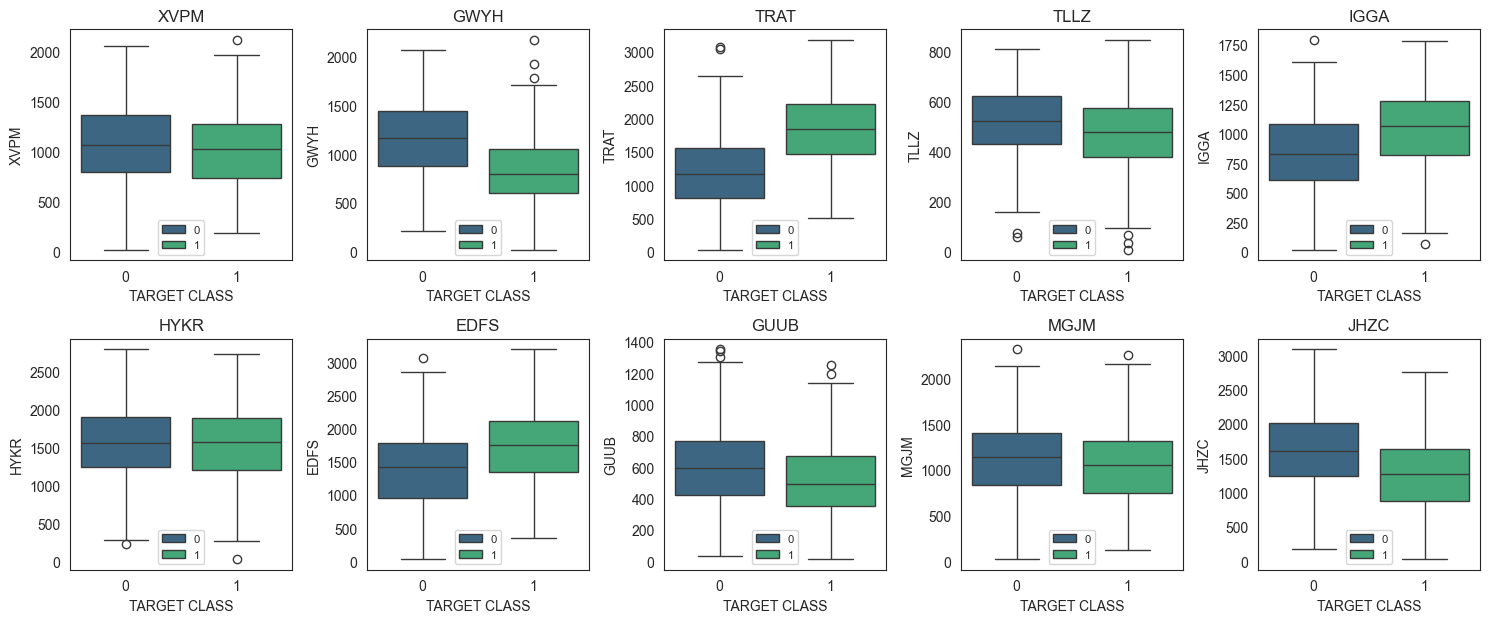

In [9]:
# Definindo o número de subplots por linha
subplots_por_linha = 5
num_linhas = (len(df.columns) - 1) // subplots_por_linha + 1

# Criando a figura e os subplots
fig, axs = plt.subplots(num_linhas, subplots_por_linha, figsize=(15, 3*num_linhas))

# Loop sobre as colunas e plotagem dos boxplots
for i, column in enumerate(df.columns[:-1]):
    linha = i // subplots_por_linha
    coluna = i % subplots_por_linha
    sns.boxplot(data=df, y=column, x='TARGET CLASS', hue='TARGET CLASS', ax=axs[linha, coluna], palette='viridis')
    axs[linha, coluna].set_title(column)  # Adicionando título a cada subplot
    axs[linha, coluna].set_xlabel('TARGET CLASS')  # Adicionando rótulo ao eixo x
    axs[linha, coluna].legend(loc='lower center', fontsize=8)

# Removendo subplots extras se houver
for j in range(len(df.columns) - 1, num_linhas * subplots_por_linha):
    fig.delaxes(axs.flatten()[j])

plt.tight_layout()  # Ajusta automaticamente os espaços entre os subplots
plt.show()

# 2.Tratamento dos Dados
- Não foram encontrados dados faltantes, nulos e infinitos.
- Foram observadas instâncias com dados discrepantes (outliers) em todas as colunas exceto 'JHZC'. Caso estes dados atrapalhem a execução e performance do modelo, eles serão eliminados na etapa da construção do modelo.


# 3. Análise Exploratória de Dados
Nesta etapa serão realizadas análises de correlação e distribuição.

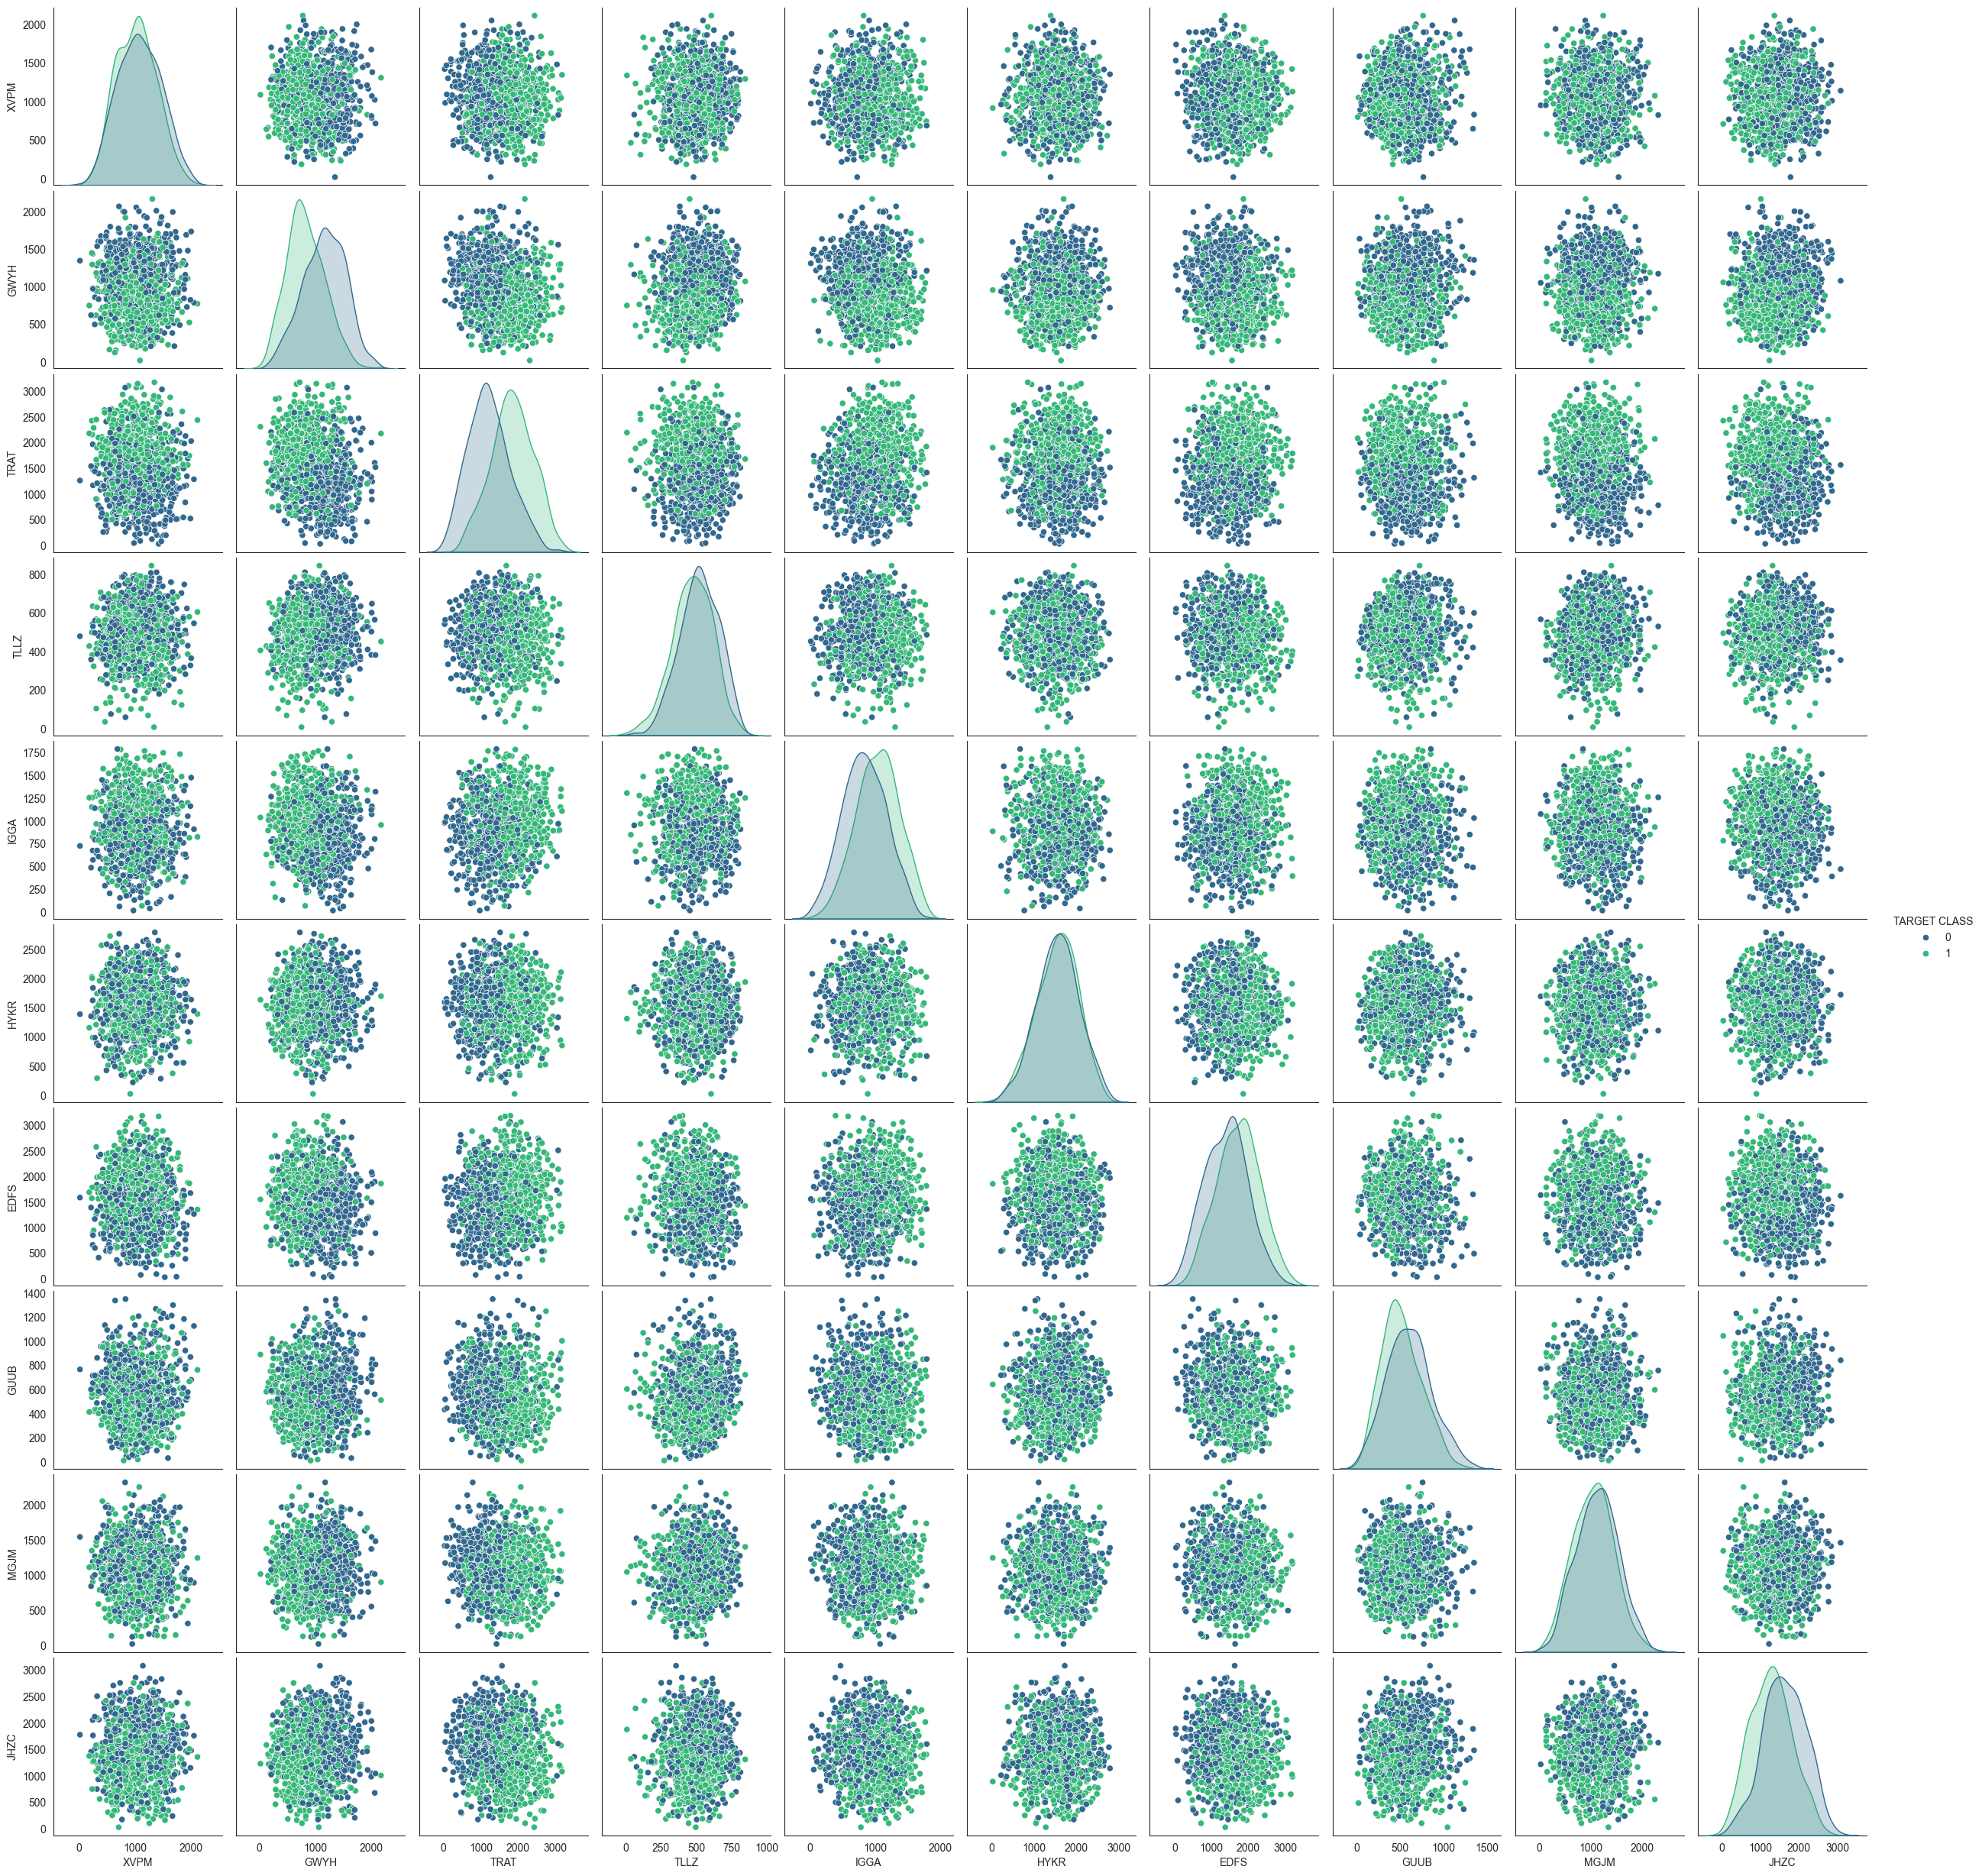

In [10]:
sns.pairplot(data=df,
             hue='TARGET CLASS',
             palette='viridis')

<Axes: >

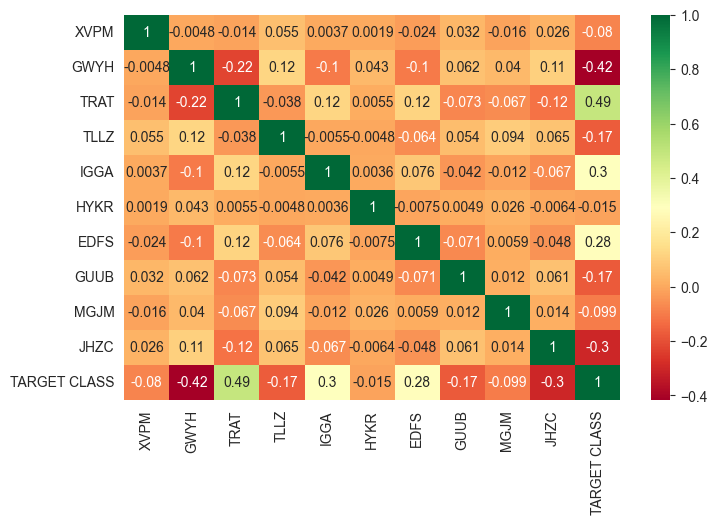

In [11]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(8,5))
sns.heatmap(data=correlation_matrix,
            annot=True,
            cmap='RdYlGn')

In [12]:
def print_top_correlations(correlation_matrix):
    top_correlations = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()

    # Pegue as 10 maiores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].head(10)
    count = 0
    print('Maiores Correlações:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")

    # Pegue as 10 menores correlações (ignorando a correlação com si mesmo, que sempre será 1.0)
    top_10_correlations = top_correlations[top_correlations.index.get_level_values(0) != top_correlations.index.get_level_values(1)].tail(10)
    top_10_correlations.sort_values(ascending=True,inplace=True)
    count = 0
    print(f'\nMenores Correlações:')
    for index, value in top_10_correlations.items():
        count += 1
        print(f"{count}: {index[0]} - {index[1]}: {value}")

print_top_correlations(correlation_matrix)

Maiores Correlações:
1: TRAT - TARGET CLASS: 0.4893472420411506
2: TARGET CLASS - IGGA: 0.2953903926589021
3: EDFS - TARGET CLASS: 0.2816074566759537
4: IGGA - TRAT: 0.12487000207950702
5: GWYH - TLLZ: 0.1216225916365091
6: EDFS - TRAT: 0.11873592331613822
7: JHZC - GWYH: 0.10553223572409422
8: MGJM - TLLZ: 0.0941206034129996
9: IGGA - EDFS: 0.07630380150352699
10: TLLZ - JHZC: 0.06514253440348233

Menores Correlações:
1: TARGET CLASS - GWYH: -0.41616780583473983
2: JHZC - TARGET CLASS: -0.30172484578391984
3: TRAT - GWYH: -0.22485857381583924
4: GUUB - TARGET CLASS: -0.17449565779936038
5: TARGET CLASS - TLLZ: -0.1720292186283154
6: TRAT - JHZC: -0.11981587358271913
7: IGGA - GWYH: -0.10479515551423173
8: EDFS - GWYH: -0.102220941044453
9: MGJM - TARGET CLASS: -0.09888667159120185
10: TARGET CLASS - XVPM: -0.0798959826165945


# 4. Padronização e divisão dos dados em Treino e Teste

In [14]:
# Processo de Padronização dos Dados
from sklearn.preprocessing import StandardScaler

In [15]:
# Instanciando o scaler
scaler = StandardScaler() # object sklearn.preprocessing._data.StandardScaler  

In [16]:
# Input de todos os dados para a normalização exceto o label
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [17]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
scaled_features

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [18]:
df_padronizado = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_padronizado.head(1)

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627

In [19]:
df.head(1)

XVPM        GWYH         TRAT        TLLZ        IGGA         HYKR  \
0  1636.670614  817.988525  2565.995189  358.347163  550.417491  1618.870897   

          EDFS        GUUB         MGJM        JHZC  TARGET CLASS  
0  2147.641254  330.727893  1494.878631  845.136088             0

In [20]:
# Divisao em treino e teste
from sklearn.model_selection import train_test_split

X = df_padronizado

y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# 5. Modelagem do Algorítmo KNN com diferentes valores de K
- Será feito um loop que irá executar o algorítmo KNN com valores de K variando de 1 a 100 até encontraremos o modelo com o melhor ajuste.

In [21]:
# imports para o modelo
from sklearn.neighbors import KNeighborsClassifier

In [22]:
error_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test)) # quero a média dos erros quando as predições forem diferentes do rótulos verdadeiros

Text(0, 0.5, 'Taxa de Erro')

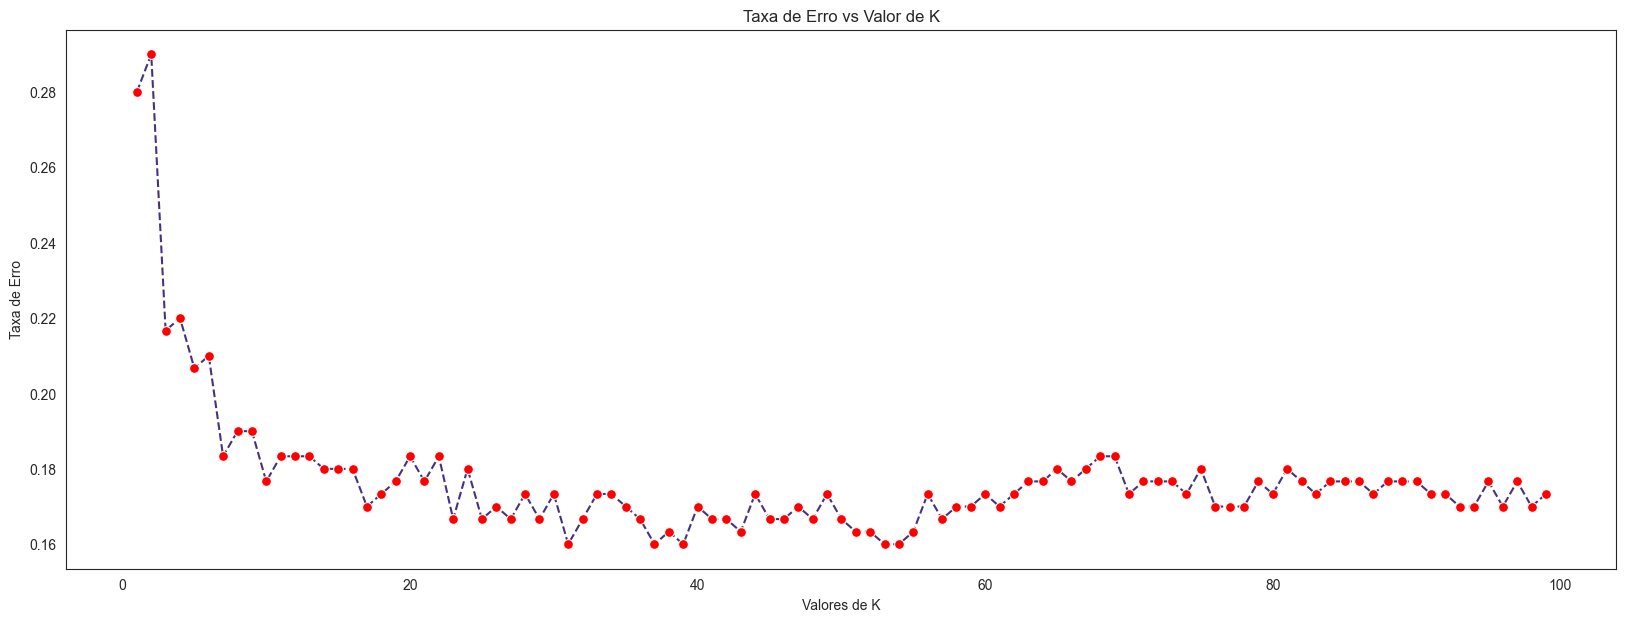

In [23]:
plt.figure(figsize=(20,7))
sns.lineplot(x=range(1,100), y=error_rate,
             linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=7)
plt.title('Taxa de Erro vs Valor de K')
plt.xlabel('Valores de K')
plt.ylabel('Taxa de Erro')

In [24]:
# Índice do menor valor da lista error_rate
min_value_index = error_rate.index(min(error_rate))
print(f'Índice do menor valor: {min_value_index}\nerror_rate[{min_value_index}] = {min(error_rate)}')

Índice do menor valor: 30
error_rate[30] = 0.16


### A menor taxa de erro foi encontrada com K=30
- O algorítmo será refeito com o número de vizinhos igual a 30 e serão analisadas suas métricas de performance.

In [25]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# 6. Sumários, métricas e conclusões.

In [26]:
# Imports para calcularmos as métricas
from sklearn.metrics import classification_report, confusion_matrix

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       152
           1       0.82      0.84      0.83       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



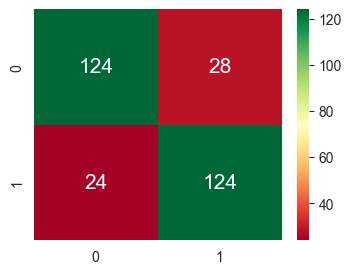

In [27]:
matriz_confusao = confusion_matrix(y_test,predictions)
plt.figure(figsize=(4,3))
sns.heatmap(matriz_confusao,
            annot=True,
            fmt='d', # números formatados sem notação cientifica, senão ficaria por exemplo '1.5e+02'
            cmap='RdYlGn',
            annot_kws={'fontsize': 15})

print(classification_report(y_test,predictions))

## </b><u>Conclusões:</u>

<b>Verdadeiros Negativos (TN):</b> 124 casos em que o modelo previu corretamente que a classe era negativa (0).

<b>Falsos Positivos (FP):</b> 28 casos em que o modelo previu incorretamente que a classe era positiva (1), mas era negativa na verdade.

<b>Falsos Negativos (FN):</b> 24 casos em que o modelo previu incorretamente que a classe era negativa (0), mas era positiva na verdade.

<b>Verdadeiros Positivos (TP):</b> 124 casos em que o modelo previu corretamente que a classe era positiva (1).


<b>Precision (Precisão):</b>

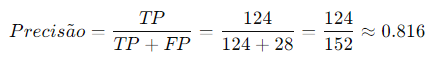

- Indica a proporção de identificações positivas que foram realmente corretas. Você obteve uma precisão de 0.84 para a classe 0 e 0.82 para a classe 1, o que é bom.

<b>Recall (Revocação ou Sensibilidade):</b>

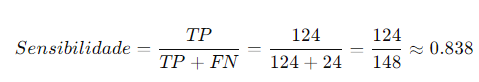

- Indica a proporção de positivos reais que foram corretamente identificados. Os valores de 0.82 para a classe 0 e 0.84 para a classe 1 sugerem que o modelo tem uma capacidade relativamente equilibrada de identificar todas as classes.


<b>F1-Score:</b>

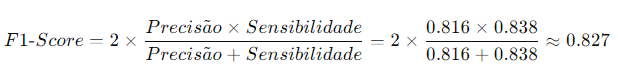

- É a média harmônica entre precisão e recall, fornecendo um balanço entre as duas métricas. Com valores próximos de 0.83 para ambas as classes, indica um bom equilíbrio entre precisão e recall.

<b>Accuracy (Acurácia):</b> 

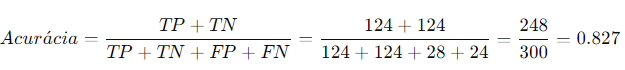

- Com uma acurácia de 0.83, mostra que o modelo foi capaz de prever corretamente a classe alvo em 83% dos casos no conjunto de teste. Isso é uma boa taxa de acurácia para muitos casos de uso, mas sempre é necessário analisar isso no contexto específico do problema.

## <u>Conclusões Finais:</u>
Todas as etapas do processo de ciência de dados foram realizadas neste projeto que, apesar de serem dados propositalmente sem contexto, foi possível realizar análises sobre sua integridade, qualidade, suas distribuições e correlações. 
Antes da execução do modelo, o dataset foi padronizado e dividido com sucesso em 70% treino 30% teste.
O modelo foi executado em loop com <i>K</i> variando de 1 a 100 para a busca da menor taxa de erro e consequentemente o valor de K que gere esta menor taxa de erro. (neste caso foi k=30).
Uma nova execução do modelo com k=30 foi feita e sua performance foi mensurada por meio de métricas padrão, incluindo precisão, recall, F1-score e acurácia. Essas métricas nos forneceram insights valiosos sobre a capacidade do modelo em classificar corretamente as instâncias nas classes relevantes.

Agradeço pela oportunidade de realizar este projeto, que contribuiu significativamente para o meu desenvolvimento profissional e para uma compreensão mais ampla do processo de ciência de dados e modelagens preditivas.

Gustavo.